In [1]:
import numpy as np
from scipy.stats import qmc

In [2]:
def f(u):
    """
    u est un vecteur de taille d>=1 -> np.array
    """
    d = len(u)
    somme = np.sum(u)
    return np.cos(2*np.pi*(1/d * somme -0.5))

f(np.array([1,0.5,0.3,0.4]))

np.float64(0.9510565162951535)

# Question 1

$$\int_{[0,1]^d}^{}{f(u)du}  \simeq \frac{1}{N}\sum_{i=1}^{N}f(u_{(i)}) \text{ with } u_{(i)} \sim^{iid} U([0,1]^d)$$

In [3]:
# Monte Carlo standard
def monte_carlo_integration(d, N):
    samples = np.random.uniform(0, 1, (N, d))
    return np.mean(np.array([f(sample) for sample in samples]))

# Quasi-Monte Carlo (Sobol sequence)
def quasi_monte_carlo_integration(d, N):
    sobol = qmc.Sobol(d, scramble=True)
    samples = sobol.random(N)
    return np.mean(np.array([f(sample) for sample in samples]))

# Différentes valeurs de d et N
d_values = [1, 2, 3,5, 10, 100, 200]
N_values = [100, 1000, 10000, 20000]

# Stocker les résultats
results = {}

for d in d_values:
    results[d] = {}
    for N in N_values:
        mc_result = monte_carlo_integration(d, N)
        qmc_result = quasi_monte_carlo_integration(d, N)
        results[d][N] = (mc_result, qmc_result)

# Affichage des résultats
for d in results:
    print(f"Dimension d = {d}")
    for N in results[d]:
        mc, qmc_res = results[d][N]
        print(f"  N = {N}: Monte Carlo = {mc:.6f}, Quasi-Monte Carlo = {qmc_res:.6f}")
    print()

c:\Users\Célian\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_qmc.py:958: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


Dimension d = 1
  N = 100: Monte Carlo = 0.058906, Quasi-Monte Carlo = 0.000003
  N = 1000: Monte Carlo = 0.009777, Quasi-Monte Carlo = 0.000205
  N = 10000: Monte Carlo = 0.005009, Quasi-Monte Carlo = 0.000018
  N = 20000: Monte Carlo = 0.008338, Quasi-Monte Carlo = 0.000000

Dimension d = 2
  N = 100: Monte Carlo = 0.389620, Quasi-Monte Carlo = 0.398891
  N = 1000: Monte Carlo = 0.414002, Quasi-Monte Carlo = 0.405586
  N = 10000: Monte Carlo = 0.404596, Quasi-Monte Carlo = 0.405335
  N = 20000: Monte Carlo = 0.405200, Quasi-Monte Carlo = 0.405272

Dimension d = 3
  N = 100: Monte Carlo = 0.610471, Quasi-Monte Carlo = 0.559304
  N = 1000: Monte Carlo = 0.554233, Quasi-Monte Carlo = 0.564678
  N = 10000: Monte Carlo = 0.573195, Quasi-Monte Carlo = 0.565656
  N = 20000: Monte Carlo = 0.564664, Quasi-Monte Carlo = 0.565507

Dimension d = 5
  N = 100: Monte Carlo = 0.773157, Quasi-Monte Carlo = 0.719788
  N = 1000: Monte Carlo = 0.713532, Quasi-Monte Carlo = 0.715844
  N = 10000: Monte Ca

Quand $d \to \infty$, on remarque que $I \to 1$ \
Pour la dimension $d=2$ par exemple, on peut calculer l'intégrale double explicitement et on trouve $I = \frac{4}{\pi^2} \simeq 0.40528$ et ça nous permet de remarquer que QMC converge plus vite vers le bon résultat que MC.\
De même pour $d=1$, $I = 0$ par changement de variable, et on voit la vitesse de convergence plus rapide de QMC.

### Quelques plots 

### Dimension d=2

In [10]:
import time 
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import qmc
import time

# Définir la fonction f
def f(u):
    d = len(u)
    somme = np.sum(u)
    return np.cos(2 * np.pi * (1/d * somme - 0.5))

# Monte Carlo standard en conservant d'autres valeurs pour le plot
def monte_carlo_integration(d, N):
    samples = np.random.uniform(0, 1, (N, d))
    values = np.array([f(sample) for sample in samples])
    return np.mean(values), values, samples

# Quasi-Monte Carlo (Sobol sequence) en conservant d'autres valeurs pour le plot
def quasi_monte_carlo_integration(d, N):
    sobol = qmc.Sobol(d, scramble=True)
    samples = sobol.random(N)
    values = np.array([f(sample) for sample in samples])
    return np.mean(values), values, samples

# Fixer d = 5
d = 2
N_values = [100, 1000, 10000, 20000, 50_000, 80_000]

# Approximons la "vraie" valeur de l'intégrale avec un grand N
# N_true = 1000000
# sobol = qmc.Sobol(d, scramble=True)
# samples_true = sobol.random(N_true)
true_value = 0.40528

# Stocker les résultats
mc_means = []
qmc_means = []
mc_times = []
qmc_times = []
mc_errors = []
qmc_errors = []
mc_values = {}
qmc_values = {}
mc_samples = {}
qmc_samples = {}

for N in N_values:
    # Monte Carlo
    start = time.time()
    mc_mean, mc_val, mc_samp = monte_carlo_integration(d, N)
    end = time.time()
    mc_means.append(mc_mean)
    mc_times.append(end - start)
    mc_errors.append(abs(mc_mean - true_value))
    mc_values[N] = mc_val
    mc_samples[N] = mc_samp
    
    # Quasi-Monte Carlo
    start = time.time()
    qmc_mean, qmc_val, qmc_samp = quasi_monte_carlo_integration(d, N)
    end = time.time()
    qmc_means.append(qmc_mean)
    qmc_times.append(end - start)
    qmc_errors.append(abs(qmc_mean - true_value))
    qmc_values[N] = qmc_val
    qmc_samples[N] = qmc_samp



c:\Users\Célian\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_qmc.py:958: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


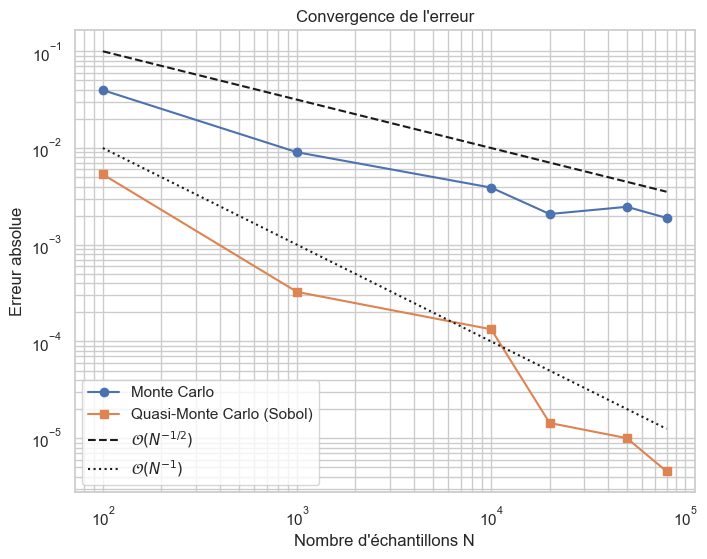

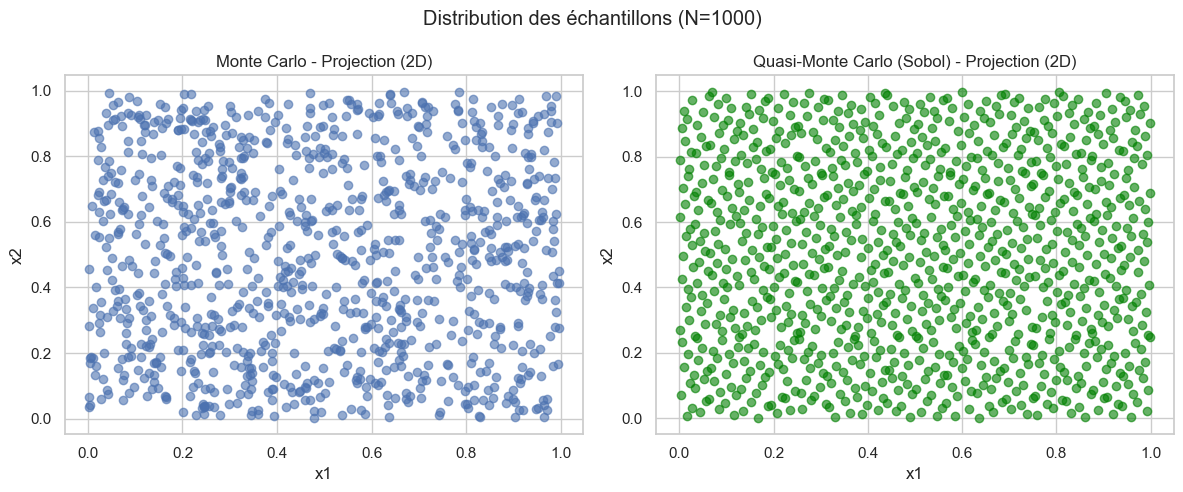

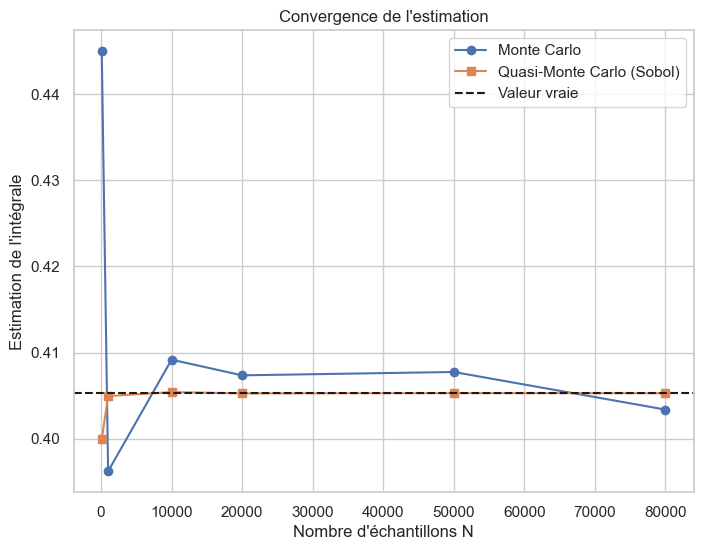

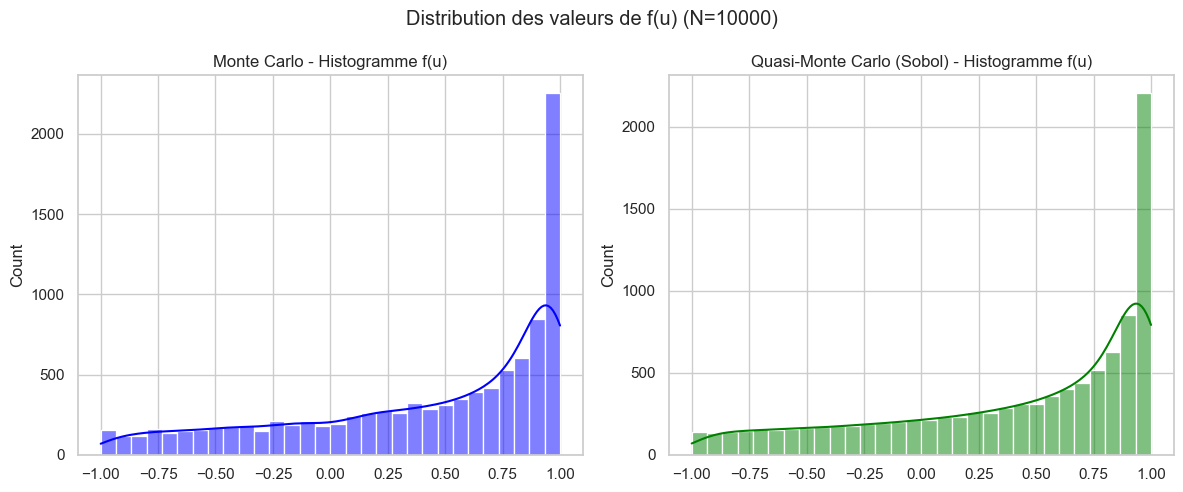

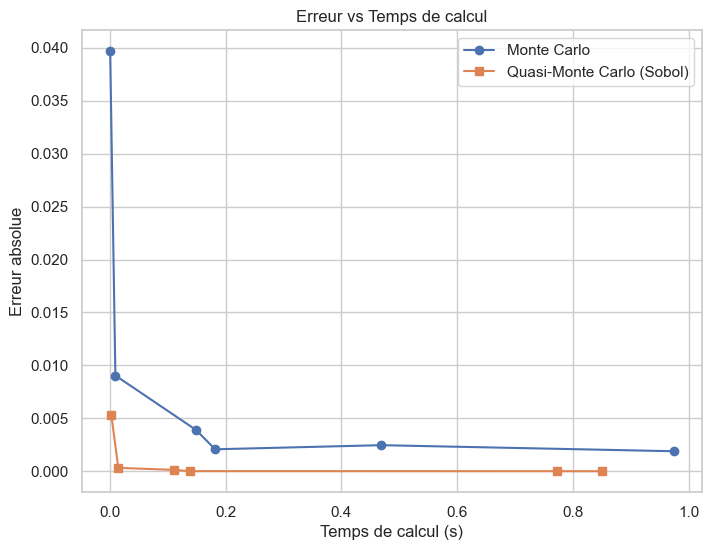

In [11]:
# Préparer pour les plots
sns.set(style="whitegrid")
N_values_log = np.log10(N_values)

# 1. Plot de convergence de l'erreur
plt.figure(figsize=(8,6))
plt.loglog(N_values, mc_errors, 'o-', label="Monte Carlo")
plt.loglog(N_values, qmc_errors, 's-', label="Quasi-Monte Carlo (Sobol)")
plt.loglog(N_values, [1/np.sqrt(N) for N in N_values], 'k--', label=r"$\mathcal{O}(N^{-1/2})$")
plt.loglog(N_values, [1/N for N in N_values], 'k:', label=r"$\mathcal{O}(N^{-1})$")
plt.xlabel("Nombre d'échantillons N")
plt.ylabel("Erreur absolue")
plt.title("Convergence de l'erreur")
plt.legend()
plt.grid(True, which="both")
plt.show()

# 2. Scatter des points
fig, axs = plt.subplots(1, 2, figsize=(12,5))

# MC scatter
axs[0].scatter(mc_samples[1000][:,0], mc_samples[1000][:,1], alpha=0.6)
axs[0].set_title("Monte Carlo - Projection (2D)")
axs[0].set_xlabel("x1")
axs[0].set_ylabel("x2")

# QMC scatter
axs[1].scatter(qmc_samples[1000][:,0], qmc_samples[1000][:,1], alpha=0.6, color='green')
axs[1].set_title("Quasi-Monte Carlo (Sobol) - Projection (2D)")
axs[1].set_xlabel("x1")
axs[1].set_ylabel("x2")

plt.suptitle("Distribution des échantillons (N=1000)")
plt.tight_layout()
plt.show()

# 3. Evolution de l'estimation
plt.figure(figsize=(8,6))
plt.plot(N_values, mc_means, 'o-', label="Monte Carlo")
plt.plot(N_values, qmc_means, 's-', label="Quasi-Monte Carlo (Sobol)")
plt.axhline(true_value, color='k', linestyle='--', label="Valeur vraie")
plt.xlabel("Nombre d'échantillons N")
plt.ylabel("Estimation de l'intégrale")
plt.title("Convergence de l'estimation")
plt.legend()
plt.grid(True)
plt.show()

# 4. Histogrammes des valeurs de f(u)
fig, axs = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(mc_values[10000], bins=30, kde=True, ax=axs[0], color='blue')
axs[0].set_title("Monte Carlo - Histogramme f(u)")
sns.histplot(qmc_values[10000], bins=30, kde=True, ax=axs[1], color='green')
axs[1].set_title("Quasi-Monte Carlo (Sobol) - Histogramme f(u)")
plt.suptitle("Distribution des valeurs de f(u) (N=10000)")
plt.tight_layout()
plt.show()

# 5. Erreur vs Temps de calcul
plt.figure(figsize=(8,6))
plt.plot(mc_times, mc_errors, 'o-', label="Monte Carlo")
plt.plot(qmc_times, qmc_errors, 's-', label="Quasi-Monte Carlo (Sobol)")
plt.xlabel("Temps de calcul (s)")
plt.ylabel("Erreur absolue")
plt.title("Erreur vs Temps de calcul")
plt.legend()
plt.grid(True)
plt.show()

### Dimension d=10

In [27]:
import time 
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import qmc
import time


np.random.seed(40)
# Définir la fonction f
def f(u):
    d = len(u)
    somme = np.sum(u)
    return np.cos(2 * np.pi * (1/d * somme - 0.5))

# Monte Carlo standard en conservant d'autres valeurs pour le plot
def monte_carlo_integration(d, N):
    samples = np.random.uniform(0, 1, (N, d))
    values = np.array([f(sample) for sample in samples])
    return np.mean(values), values, samples

# Quasi-Monte Carlo (Sobol sequence) en conservant d'autres valeurs pour le plot
def quasi_monte_carlo_integration(d, N):
    sobol = qmc.Sobol(d, scramble=True)
    samples = sobol.random(N)
    values = np.array([f(sample) for sample in samples])
    return np.mean(values), values, samples

# Fixer d = 10
d = 10
N_values = [100, 1000, 10000, 20000,50_000,70_000, 80_000,100_000, 200_000]

# Approximons la "vraie" valeur de l'intégrale avec un grand N
N_true = 1_000_000
sobol = qmc.Sobol(d, scramble=True)
samples_true = sobol.random(N_true)
true_value = np.mean(np.array([f(sample) for sample in samples_true]))


# Stocker les résultats
mc_means = []
qmc_means = []
mc_times = []
qmc_times = []
mc_errors = []
qmc_errors = []
mc_values = {}
qmc_values = {}
mc_samples = {}
qmc_samples = {}

for N in N_values:
    # Monte Carlo
    start = time.time()
    mc_mean, mc_val, mc_samp = monte_carlo_integration(d, N)
    end = time.time()
    mc_means.append(mc_mean)
    mc_times.append(end - start)
    mc_errors.append(abs(mc_mean - true_value))
    mc_values[N] = mc_val
    mc_samples[N] = mc_samp
    
    # Quasi-Monte Carlo
    start = time.time()
    qmc_mean, qmc_val, qmc_samp = quasi_monte_carlo_integration(d, N)
    end = time.time()
    qmc_means.append(qmc_mean)
    qmc_times.append(end - start)
    qmc_errors.append(abs(qmc_mean - true_value))
    qmc_values[N] = qmc_val
    qmc_samples[N] = qmc_samp



c:\Users\Célian\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_qmc.py:958: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


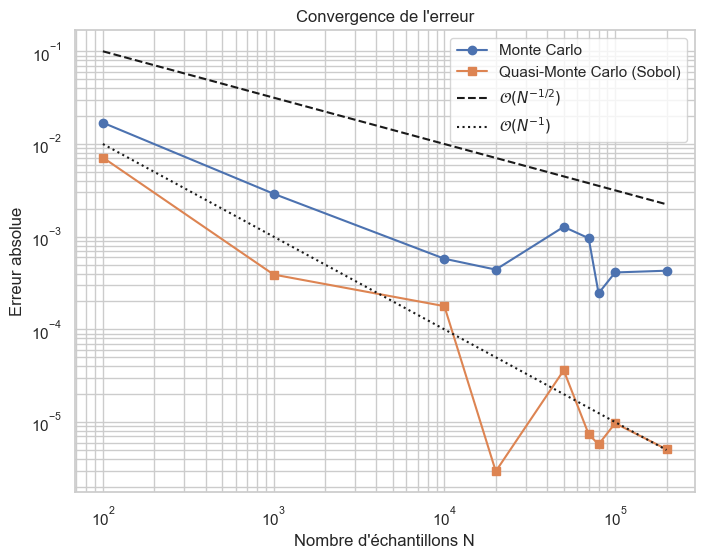

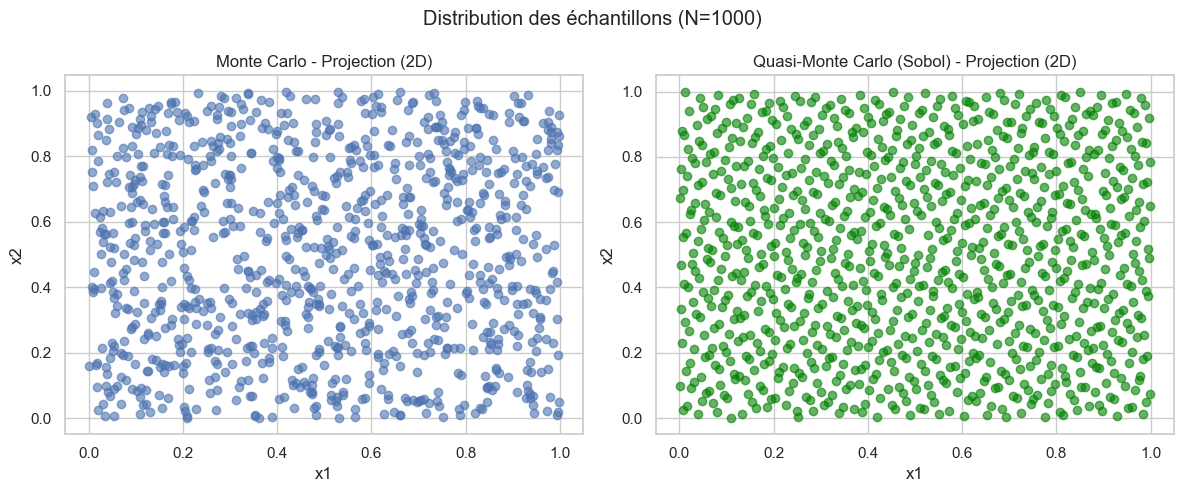

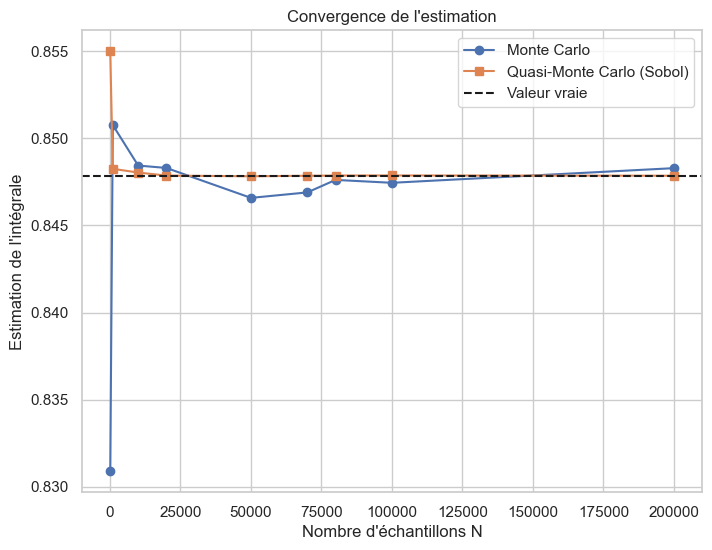

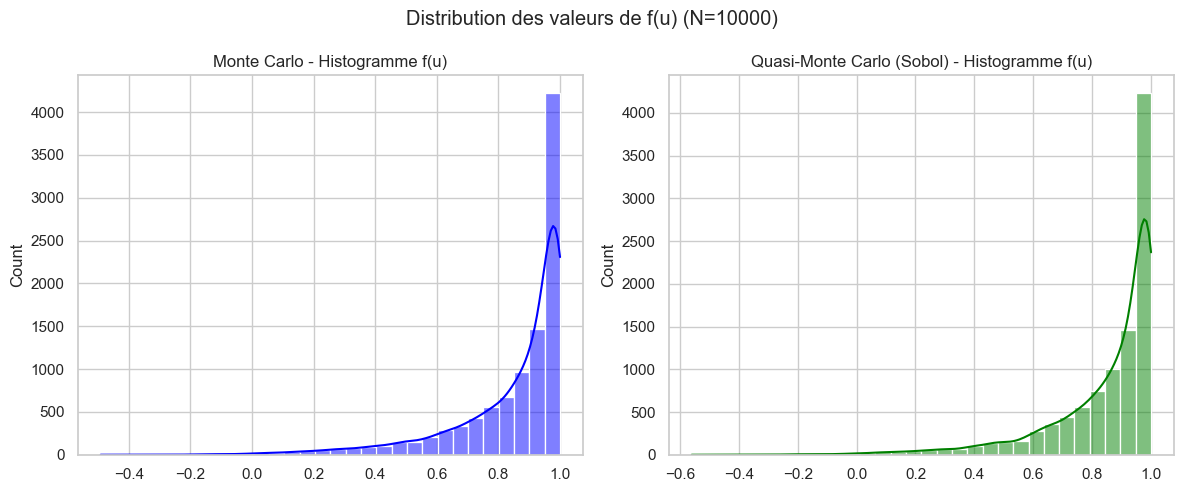

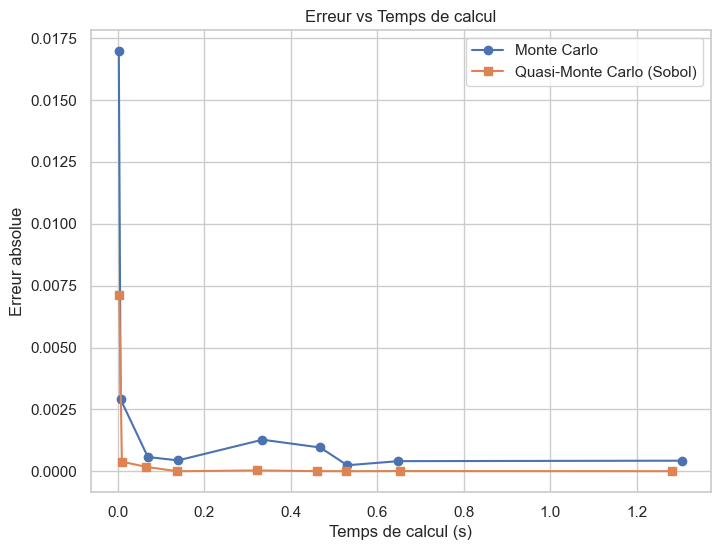

In [28]:
# Préparer pour les plots
sns.set(style="whitegrid")
N_values_log = np.log10(N_values)

# 1. Plot de convergence de l'erreur
plt.figure(figsize=(8,6))
plt.loglog(N_values, mc_errors, 'o-', label="Monte Carlo")
plt.loglog(N_values, qmc_errors, 's-', label="Quasi-Monte Carlo (Sobol)")
plt.loglog(N_values, [1/np.sqrt(N) for N in N_values], 'k--', label=r"$\mathcal{O}(N^{-1/2})$")
plt.loglog(N_values, [1/N for N in N_values], 'k:', label=r"$\mathcal{O}(N^{-1})$")
plt.xlabel("Nombre d'échantillons N")
plt.ylabel("Erreur absolue")
plt.title("Convergence de l'erreur")
plt.legend()
plt.grid(True, which="both")
plt.show()

# 2. Scatter des points
fig, axs = plt.subplots(1, 2, figsize=(12,5))

# MC scatter
axs[0].scatter(mc_samples[1000][:,0], mc_samples[1000][:,1], alpha=0.6)
axs[0].set_title("Monte Carlo - Projection (2D)")
axs[0].set_xlabel("x1")
axs[0].set_ylabel("x2")

# QMC scatter
axs[1].scatter(qmc_samples[1000][:,0], qmc_samples[1000][:,1], alpha=0.6, color='green')
axs[1].set_title("Quasi-Monte Carlo (Sobol) - Projection (2D)")
axs[1].set_xlabel("x1")
axs[1].set_ylabel("x2")

plt.suptitle("Distribution des échantillons (N=1000)")
plt.tight_layout()
plt.show()

# 3. Evolution de l'estimation
plt.figure(figsize=(8,6))
plt.plot(N_values, mc_means, 'o-', label="Monte Carlo")
plt.plot(N_values, qmc_means, 's-', label="Quasi-Monte Carlo (Sobol)")
plt.axhline(true_value, color='k', linestyle='--', label="Valeur vraie")
plt.xlabel("Nombre d'échantillons N")
plt.ylabel("Estimation de l'intégrale")
plt.title("Convergence de l'estimation")
plt.legend()
plt.grid(True)
plt.show()

# 4. Histogrammes des valeurs de f(u)
fig, axs = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(mc_values[10000], bins=30, kde=True, ax=axs[0], color='blue')
axs[0].set_title("Monte Carlo - Histogramme f(u)")
sns.histplot(qmc_values[10000], bins=30, kde=True, ax=axs[1], color='green')
axs[1].set_title("Quasi-Monte Carlo (Sobol) - Histogramme f(u)")
plt.suptitle("Distribution des valeurs de f(u) (N=10000)")
plt.tight_layout()
plt.show()

# 5. Erreur vs Temps de calcul
plt.figure(figsize=(8,6))
plt.plot(mc_times, mc_errors, 'o-', label="Monte Carlo")
plt.plot(qmc_times, qmc_errors, 's-', label="Quasi-Monte Carlo (Sobol)")
plt.xlabel("Temps de calcul (s)")
plt.ylabel("Erreur absolue")
plt.title("Erreur vs Temps de calcul")
plt.legend()
plt.grid(True)
plt.show()

# Question 2

$$
e_{0,k} = \left\{ \left( \frac{2j_1 + 1}{2k}, \dots, \frac{2j_s + 1}{2k} \right) 
\text{ s.t. } (j_1, \dots, j_s) \in \{0, \dots, k-1\}^s \right\}
\ $$




$$
\hat{I}_{1,k}(f) := \frac{1}{k^s} \sum_{c \in \mathcal{e}_0,k} f(c + U_c), \quad U_c \sim \mathcal{U} \left( \left[ -\frac{1}{2k}, \frac{1}{2k} \right]^s \right)
$$


In [31]:


def haber_estimator_1(f, k, s):
    """
    Estimateur de Haber (ordre 1) avec gestion mémoire efficace.

    Paramètres :
        f : fonction à intégrer
        k : nombre de subdivisions par dimension
        s : dimension de l'espace

    Retour :
        Estimation de l'intégrale de f sur [0,1]^s
    """
    total = 0.0
    count = 0
    shape = (k,) * s          # ex: (4, 4, 4)      

    # Pour chaque cellule du pavage (k^s cases)
    for idx in np.ndindex(*shape):
        #print(f"idx : {idx}")
        center = (np.array(idx) + 0.5) / k  # Centre de la cellule
        #print(f"centers : {center}")
        u = np.random.uniform(-0.5/k, 0.5/k, size=s)  # Perturbation uniforme
        total += f(center + u)
        count += 1

    return total / count



def haber_estimator_2(f, k, s):
    """
    Estimateur de Haber (ordre 2) avec boucle explicite pour réduire la mémoire.

    Paramètres :
        f : fonction à intégrer
        k : nombre de subdivisions par dimension
        s : dimension de l'espace

    Retour :
        Estimation de l'intégrale de f sur [0,1]^s
    """
    total = 0.0
    count = 0
    shape = (k,)*s
    for idx in np.ndindex(*shape):
        center = (np.array(idx) + 0.5) / k
        u = np.random.uniform(-0.5/k, 0.5/k, size=s)
        total += (f(center + u) + f(center - u)) / 2
        count += 1

    return total / count



# # Test function
# def test_function(x):
#     return np.cos(2 * np.pi * (np.mean(x, axis=1) - 0.5))



In [5]:
d_values = [1, 2, 3]
k_values = [10, 20, 50, 100]  # Number of subintervals per dimension


results = {}

for d in d_values:
    results[d] = {}
    for k in k_values:
        I1 = haber_estimator_1(f, k, d)
        I2 = haber_estimator_2(f, k, d)
        results[d][k] = (I1,I2)

# Affichage des résultats
for d in results:
    print(f"Dimension d = {d}")
    for k in results[d]:
        mc, qmc_res = results[d][k]
        print(f"k = {k}, d= {d},number of centers = {k**d}: Haber1 = {mc:.6f}, Haber2 = {qmc_res:.6f}")
    print()

Dimension d = 1
k = 10, d= 1,number of centers = 10: Haber1 = 0.028707, Haber2 = 0.000582
k = 20, d= 1,number of centers = 20: Haber1 = 0.022451, Haber2 = -0.001098
k = 50, d= 1,number of centers = 50: Haber1 = 0.001230, Haber2 = 0.000018
k = 100, d= 1,number of centers = 100: Haber1 = -0.000868, Haber2 = -0.000004

Dimension d = 2
k = 10, d= 2,number of centers = 100: Haber1 = 0.412161, Haber2 = 0.403614
k = 20, d= 2,number of centers = 400: Haber1 = 0.404865, Haber2 = 0.405311
k = 50, d= 2,number of centers = 2500: Haber1 = 0.405131, Haber2 = 0.405283
k = 100, d= 2,number of centers = 10000: Haber1 = 0.405277, Haber2 = 0.405284

Dimension d = 3
k = 10, d= 3,number of centers = 1000: Haber1 = 0.566761, Haber2 = 0.565630
k = 20, d= 3,number of centers = 8000: Haber1 = 0.565737, Haber2 = 0.565593
k = 50, d= 3,number of centers = 125000: Haber1 = 0.565608, Haber2 = 0.565595
k = 100, d= 3,number of centers = 1000000: Haber1 = 0.565594, Haber2 = 0.565596



Convergence d'$ Haber1$ et d'$Haber2$ vers la vraie valeur de $I$ beaucoup plus rapide que QMC et MC, par exemple en dimension 1 dès $N=20$ on est est déjà proche de 0 alors qu'il fallait attendre $N=100$ pour MC et QMC. 

On observe aussi une convergence plus rapide de la variance d'$Haber2$ grâce à la technique de réduction de variance (Antithetic Variable).

Plus k augmente, plus N augmente et plus l'estimateur d'Haber converge vers la valeur de l'intégrale.

In [6]:
d_values = [5,10]
k_values = [2,3,4]  # Number of subintervals per dimension


results = {}

for d in d_values:
    results[d] = {}
    for k in k_values:
        I1 = haber_estimator_1(f, k, d)
        I2 = haber_estimator_2(f, k, d)
        results[d][k] = (I1,I2)

# Affichage des résultats
for d in results:
    print(f"Dimension d = {d}")
    for k in results[d]:
        mc, qmc_res = results[d][k]
        print(f"  k = {k}, d= {d},number of centers = {k**d}: Haber1 = {mc:.6f}, Haber2 = {qmc_res:.6f}")
    print()

Dimension d = 5
  k = 2, d= 5,number of centers = 32: Haber1 = 0.781541, Haber2 = 0.717598
  k = 3, d= 5,number of centers = 243: Haber1 = 0.710370, Haber2 = 0.716102
  k = 4, d= 5,number of centers = 1024: Haber1 = 0.718984, Haber2 = 0.717322

Dimension d = 10
  k = 2, d= 10,number of centers = 1024: Haber1 = 0.842655, Haber2 = 0.847404
  k = 3, d= 10,number of centers = 59049: Haber1 = 0.847854, Haber2 = 0.847707
  k = 4, d= 10,number of centers = 1048576: Haber1 = 0.847896, Haber2 = 0.847857



In [7]:
d_values = [20]
k_values = [2]  # Number of subintervals per dimension


results = {}

for d in d_values:
    results[d] = {}
    for k in k_values:
        I1 = haber_estimator_1(f, k, d)
        I2 = haber_estimator_2(f, k, d)
        results[d][k] = (I1,I2)

# Affichage des résultats
for d in results:
    print(f"Dimension d = {d}")
    for k in results[d]:
        mc, qmc_res = results[d][k]
        print(f"  k = {k}, d= {d},number of centers = {k**d}: Haber1 = {mc:.6f}, Haber2 = {qmc_res:.6f}")
    print()

Dimension d = 20
  k = 2, d= 20,number of centers = 1048576: Haber1 = 0.921103, Haber2 = 0.920983



Cependant, les estimateurs d'Haber ne sont pas adaptés quand la dimension explose ($d>>10$), parce que le nombre de centre $n=k^{d}$ est très important. Une voie d'exploration serait l'utilisation de rectangle.

### Quelque plots 

### Dimension d=2

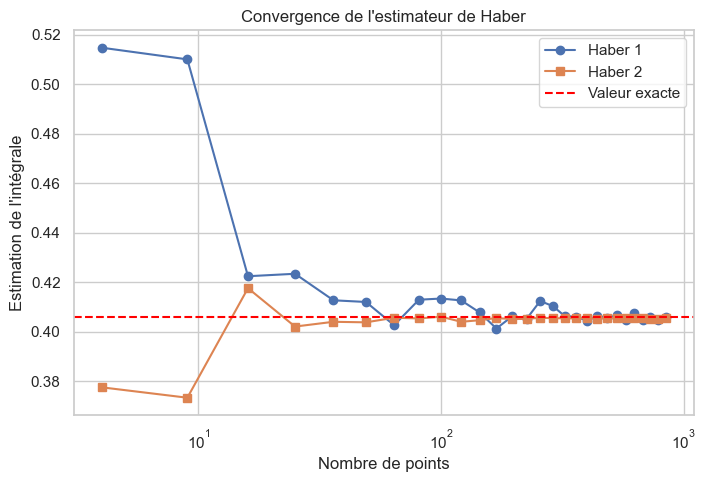

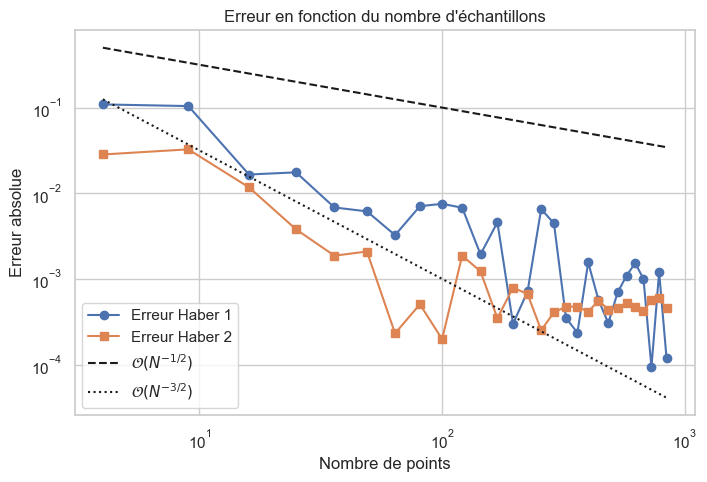

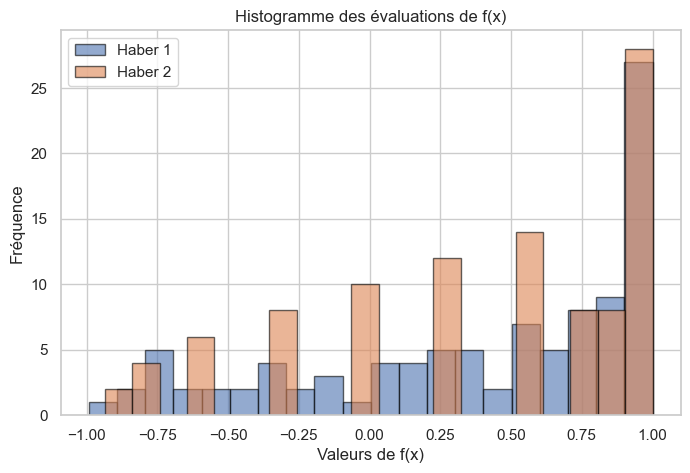

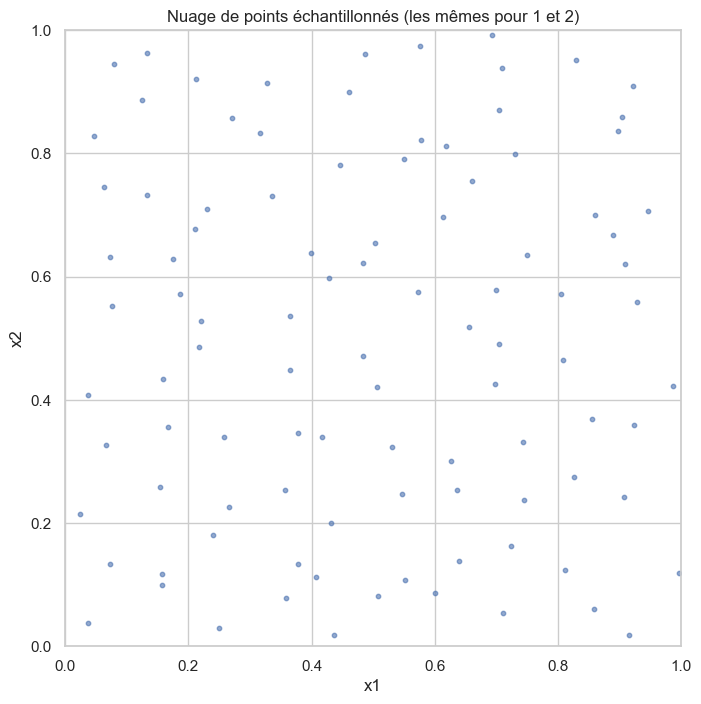

In [40]:
# ---- Plots ----

s = 2  # dimension
k_values = np.arange(2, 30)  # valeurs de k
true_integral = 0.4058  # Valeur théorique de l'intégrale

estimates_haber1 = []
estimates_haber2 = []
errors_haber1 = []
errors_haber2 = []
sample_counts = []

for k in k_values:
    est1 = haber_estimator_1(f, k, s)
    est2 = haber_estimator_2(f, k, s)
    n_samples = k**s
    error1 = np.abs(est1 - true_integral)
    error2 = np.abs(est2 - true_integral)

    estimates_haber1.append(est1)
    estimates_haber2.append(est2)
    errors_haber1.append(error1)
    errors_haber2.append(error2)
    sample_counts.append(n_samples)

estimates_haber1 = np.array(estimates_haber1)
estimates_haber2 = np.array(estimates_haber2)
errors_haber1 = np.array(errors_haber1)
errors_haber2 = np.array(errors_haber2)
sample_counts = np.array(sample_counts)

# ---- Plots ----

# 1. Évolution des estimations
plt.figure(figsize=(8,5))
plt.plot(sample_counts, estimates_haber1, marker='o', label='Haber 1')
plt.plot(sample_counts, estimates_haber2, marker='s', label='Haber 2')
plt.axhline(true_integral, color='red', linestyle='--', label='Valeur exacte')
plt.xscale('log')
plt.xlabel('Nombre de points')
plt.ylabel('Estimation de l\'intégrale')
plt.title('Convergence de l\'estimateur de Haber')
plt.legend()
plt.grid(True)
plt.show()

# 2. Erreur vs Nombre de points
ref_sqrt = 1 / np.sqrt(sample_counts)
ref_pow32 = 1 / (sample_counts ** (3/2))

plt.figure(figsize=(8,5))
plt.plot(sample_counts, errors_haber1, marker='o', label='Erreur Haber 1')
plt.plot(sample_counts, errors_haber2, marker='s', label='Erreur Haber 2')
plt.plot(sample_counts, ref_sqrt, 'k--', label=r'$\mathcal{O}(N^{-1/2})$')
plt.plot(sample_counts, ref_pow32, 'k:', label=r'$\mathcal{O}(N^{-3/2})$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Nombre de points')
plt.ylabel('Erreur absolue')
plt.title('Erreur en fonction du nombre d\'échantillons')
plt.legend()
plt.grid(True)
plt.show()

# 3. Histogramme des évaluations de f(x) pour un k donné
k_hist = 10
s = 2
values_haber1 = []
values_haber2 = []
shape = (k_hist,)*s
for idx in np.ndindex(*shape):
    center = (np.array(idx) + 0.5) / k_hist
    u = np.random.uniform(-0.5/k_hist, 0.5/k_hist, size=s)
    values_haber1.append(f(center + u))
    values_haber2.append((f(center + u) + f(center - u)) / 2)
values_haber1 = np.array(values_haber1)
values_haber2 = np.array(values_haber2)

plt.figure(figsize=(8,5))
plt.hist(values_haber1, bins=20, alpha=0.6, label='Haber 1', edgecolor='black')
plt.hist(values_haber2, bins=20, alpha=0.6, label='Haber 2', edgecolor='black')
plt.xlabel('Valeurs de f(x)')
plt.ylabel('Fréquence')
plt.title('Histogramme des évaluations de f(x)')
plt.legend()
plt.grid(True)
plt.show()

# 4. Nuage de points (les mêmes pour les deux méthodes)
points = []
shape = (k_hist,)*s
for idx in np.ndindex(*shape):
    center = (np.array(idx) + 0.5) / k_hist
    u = np.random.uniform(-0.5/k_hist, 0.5/k_hist, size=s)
    points.append(center + u)
points = np.array(points)

plt.figure(figsize=(8,8))
plt.scatter(points[:,0], points[:,1], s=10, alpha=0.6)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Nuage de points échantillonnés (les mêmes pour 1 et 2)')
plt.grid(True)
plt.gca().set_aspect('equal')
plt.show()

### Dimension d=7

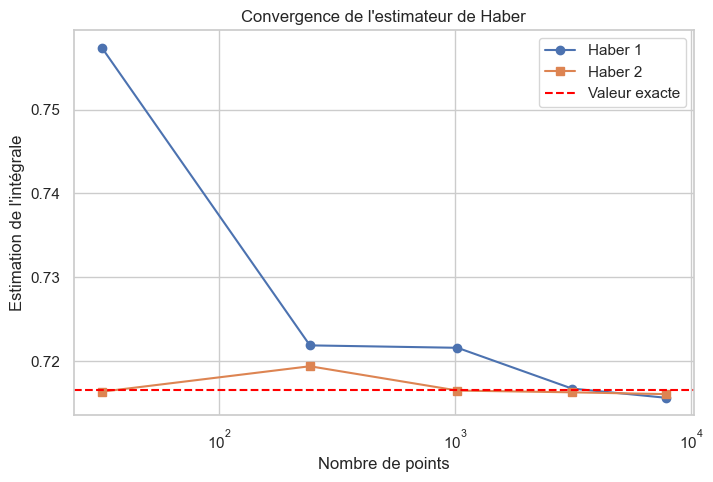

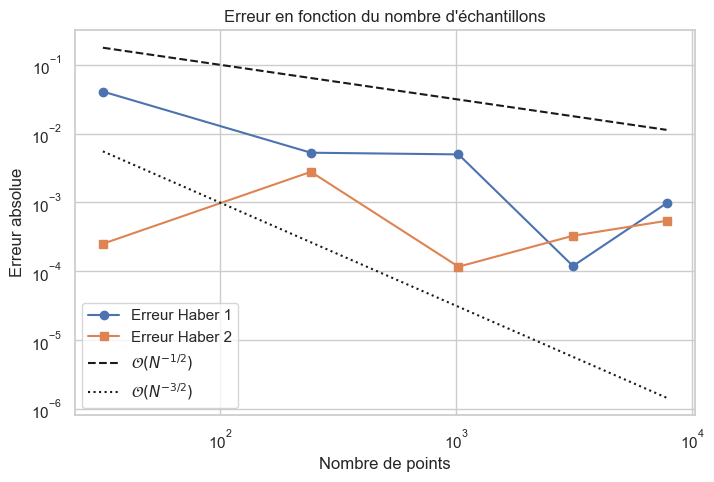

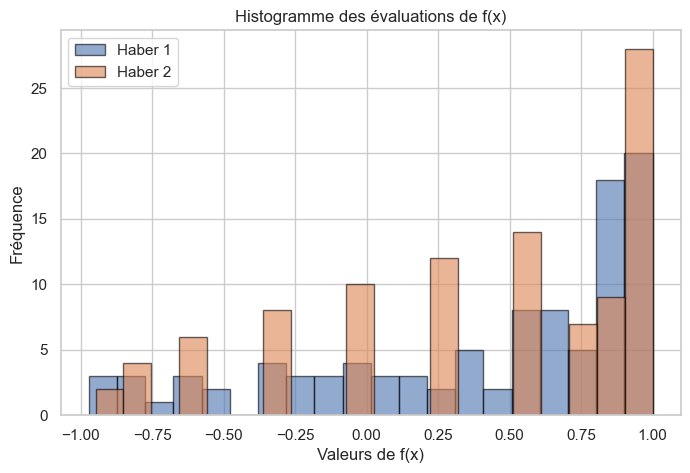

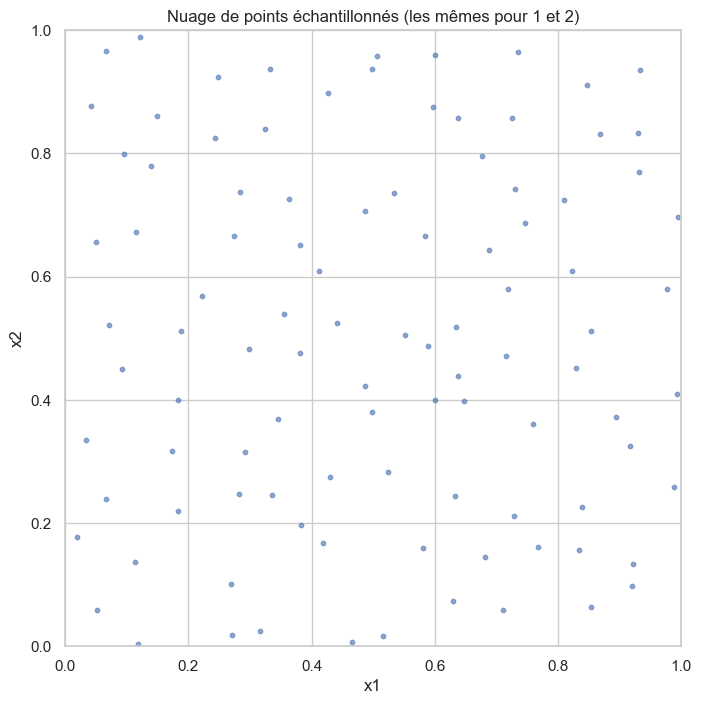

In [46]:
# ---- Plots ----

s = 5  # dimension
k_values = np.arange(2, 7)  # valeurs de k
true_integral = 0.71657  # Valeur théorique de l'intégrale

estimates_haber1 = []
estimates_haber2 = []
errors_haber1 = []
errors_haber2 = []
sample_counts = []

for k in k_values:
    est1 = haber_estimator_1(f, k, s)
    est2 = haber_estimator_2(f, k, s)
    n_samples = k**s
    error1 = np.abs(est1 - true_integral)
    error2 = np.abs(est2 - true_integral)

    estimates_haber1.append(est1)
    estimates_haber2.append(est2)
    errors_haber1.append(error1)
    errors_haber2.append(error2)
    sample_counts.append(n_samples)

estimates_haber1 = np.array(estimates_haber1)
estimates_haber2 = np.array(estimates_haber2)
errors_haber1 = np.array(errors_haber1)
errors_haber2 = np.array(errors_haber2)
sample_counts = np.array(sample_counts)

# ---- Plots ----

# 1. Évolution des estimations
plt.figure(figsize=(8,5))
plt.plot(sample_counts, estimates_haber1, marker='o', label='Haber 1')
plt.plot(sample_counts, estimates_haber2, marker='s', label='Haber 2')
plt.axhline(true_integral, color='red', linestyle='--', label='Valeur exacte')
plt.xscale('log')
plt.xlabel('Nombre de points')
plt.ylabel('Estimation de l\'intégrale')
plt.title('Convergence de l\'estimateur de Haber')
plt.legend()
plt.grid(True)
plt.show()

# 2. Erreur vs Nombre de points
ref_sqrt = 1 / np.sqrt(sample_counts)
ref_pow32 = 1 / (sample_counts ** (3/2))

plt.figure(figsize=(8,5))
plt.plot(sample_counts, errors_haber1, marker='o', label='Erreur Haber 1')
plt.plot(sample_counts, errors_haber2, marker='s', label='Erreur Haber 2')
plt.plot(sample_counts, ref_sqrt, 'k--', label=r'$\mathcal{O}(N^{-1/2})$')
plt.plot(sample_counts, ref_pow32, 'k:', label=r'$\mathcal{O}(N^{-3/2})$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Nombre de points')
plt.ylabel('Erreur absolue')
plt.title('Erreur en fonction du nombre d\'échantillons')
plt.legend()
plt.grid(True)
plt.show()

# 3. Histogramme des évaluations de f(x) pour un k donné
k_hist = 10
s = 2
values_haber1 = []
values_haber2 = []
shape = (k_hist,)*s
for idx in np.ndindex(*shape):
    center = (np.array(idx) + 0.5) / k_hist
    u = np.random.uniform(-0.5/k_hist, 0.5/k_hist, size=s)
    values_haber1.append(f(center + u))
    values_haber2.append((f(center + u) + f(center - u)) / 2)
values_haber1 = np.array(values_haber1)
values_haber2 = np.array(values_haber2)

plt.figure(figsize=(8,5))
plt.hist(values_haber1, bins=20, alpha=0.6, label='Haber 1', edgecolor='black')
plt.hist(values_haber2, bins=20, alpha=0.6, label='Haber 2', edgecolor='black')
plt.xlabel('Valeurs de f(x)')
plt.ylabel('Fréquence')
plt.title('Histogramme des évaluations de f(x)')
plt.legend()
plt.grid(True)
plt.show()

# 4. Nuage de points (les mêmes pour les deux méthodes)
points = []
shape = (k_hist,)*s
for idx in np.ndindex(*shape):
    center = (np.array(idx) + 0.5) / k_hist
    u = np.random.uniform(-0.5/k_hist, 0.5/k_hist, size=s)
    points.append(center + u)
points = np.array(points)

plt.figure(figsize=(8,8))
plt.scatter(points[:,0], points[:,1], s=10, alpha=0.6)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Nuage de points échantillonnés (les mêmes pour 1 et 2)')
plt.grid(True)
plt.gca().set_aspect('equal')
plt.show()

# Question 3

### Step 1: Understanding the Approximate Distribution 

We analyze the distribution of the quantity:

$$
S_d = \frac{1}{d} \sum_{i=1}^{d} u_i
$$

when $( d )$ is large. Given that $( u_i \sim U(0,1) )$ (i.i.d.), we apply the **Central Limit Theorem (CLT)**. Since the expectation and variance of a uniform $( U(0,1) )$ variable are:

$$
\mathbb{E}[u_i] = \frac{1}{2}, \quad \text{Var}[u_i] = \frac{1}{12},
$$

we obtain:

$$
\mathbb{E}[S_d] = \frac{1}{d} \sum \mathbb{E}[u_i] = \frac{1}{2}
$$

$$
\text{Var}[S_d] = \frac{1}{d^2} \sum \text{Var}[u_i] = \frac{1}{12d}
$$
Then we have,

$$ \sqrt{d} \times \frac{S_{d} - \frac{1}{2}}{\sqrt{1/12}} \simeq \mathcal{N} \left( 0, 1 \right)$$

Thus, for large $( d )$, we approximate:

$$
S_d \sim \mathcal{N} \left( \frac{1}{2}, \frac{1}{12d} \right)
$$



### Step  2 : Importance sampling

### Importance Sampling
$$\mathbb{E}_{x \sim P}[f(x)] = \mathbb{E}_{x \sim Q}\Big[f(x)\frac{P(x)}{Q(x)}\Big]$$
Which means  $\mathbb{E}_{x \sim P}[f(x)] \approx \frac{1}{n}\sum_{i=1}^nf(x_i)\frac{P(x_i)}{Q(x_i)}$ where $x_i$ are drawn from $Q$. This applies when $P$ and $Q$ are both normalized. For unnormalized case (not our case)   
$$\mathbb{E}_{x \sim P}[f(x)] \approx \frac{\sum_{i=1}^nf(x_i)\frac{P(x_i)}{Q(x_i)}}{\sum_{i=1}^n\frac{P(x_i)}{Q(x_i)}}$$  
Let the proposal distribution $Q(x)$ be a normal distribution.   


In [41]:
def IS_MC2(N,d, mu=1/2, sigma = None):
    if not sigma :
        sigma = 1/(12*d)
    somme = 0
    somme2 = 0
    for i in range(N):
        sample = np.random.multivariate_normal(np.full(d, 0.5), np.eye(d) *1 / (12 * d))
        somme += f(sample) * (uniform_pdf(sample,d)/normal_pdf(sample,d))
        somme2 += uniform_pdf(sample,d)/normal_pdf(sample,d)
    return somme/somme2

In [19]:
IS_MC2(1000,10)

np.float64(0.9390195430857923)

In [14]:
import numpy as np
from scipy.stats import multivariate_normal, norm

def uniform_pdf(u,d):
    """
    Densité de probabilité pour une distribution uniforme sur [0,1]^d.
    Comme c'est uniforme, la densité est constante et vaut 1 sur l'espace.
    """
    if np.all((u >= 0) & (u <= 1)):  # Vérifie que u est bien dans [0,1]^d
        return 1
    else:
        return 0  # En dehors de [0,1]^d, la densité est nulle

def normal_pdf(u,d):
    """
    Densité de probabilité pour une loi normale multidimensionnelle de dimension d  : N(mu, Sigma)
    avec mu = (1/2, ..., 1/2) et Sigma = (1/12d) * I_d (matrice identité).
    """
    mu = np.full(d, 0.5)  # Vecteur moyenne [1/2, 1/2, ..., 1/2]
    sigma2 = 1 / (12 * d)  # Variance pour chaque variable
    sigma = np.eye(d) * sigma2  # Matrice de covariance diagonale

    return multivariate_normal.pdf(u, mean=mu, cov=sigma)


In [45]:
def IS_MC(N,d, mu=1/2, sigma = None):
    if not sigma :
        sigma = 1/(12*d)
    somme = 0
    somme2 = 0
    for i in range(N):
        sample = np.random.multivariate_normal(np.full(d, 0.5), np.eye(d) *1 / (12 * d))
        somme += f(sample) * (uniform_pdf(sample,d)/normal_pdf(sample,d))
        somme2 += uniform_pdf(sample,d)/normal_pdf(sample,d)
    return somme/somme2

def IS_QMC(N,d, mu=1/2, sigma = None):
    if not sigma :
        sigma = 1/(12*d)
    """ Importance Sampling avec Quasi-Monte Carlo utilisant une séquence Sobol """
    sampler = qmc.Sobol(d, scramble=True)  # Génère des points Sobol dans [0,1]^d
    U = sampler.random(N)  # Matrice (N, d) avec des points uniformes
    # Transformation en loi normale N(0.5, 1/(12d)) avec la fonction quantile
    mu = 0.5
    sigma = np.sqrt(1 / (12 * d))
    X = norm.ppf(U, loc=mu, scale=sigma)  # Transforme U ~ U[0,1] en X ~ N(mu, sigma^2)
    


    # Importance Sampling
    somme = 0
    somme2 = 0 
    for x in X:
        somme += f(x) * (uniform_pdf(x,d) /normal_pdf(x, d))  
        somme2 += uniform_pdf(x,d) /normal_pdf(x, d)
    return somme / somme2


In [46]:
IS_QMC(100000,5)

c:\Users\Célian\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_qmc.py:958: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


np.float64(0.7551075245418932)

In [24]:
d_values = [1, 2, 3, 5]
N_values = [1000, 5000, 10000, 20000, 50000]  # Number of subintervals per dimension


results = {}

for d in d_values:
    results[d] = {}
    for N in N_values:
        I1 = IS_MC( N, d)
        I2 = IS_QMC( N, d)
        results[d][N] = (I1,I2)

# Affichage des résultats
for d in results:
    print(f"Dimension d = {d}")
    for k in results[d]:
        mc, qmc_res = results[d][k]
        print(f"  N = {k}: IS MC = {mc:.6f}, IS QMC = {qmc_res:.6f}")
    print()

Dimension d = 1
  N = 1000: IS MC = -0.038863, IS QMC = -0.004205
  N = 5000: IS MC = -0.009756, IS QMC = 0.000418
  N = 10000: IS MC = 0.000217, IS QMC = 0.000223
  N = 20000: IS MC = -0.005401, IS QMC = -0.000052
  N = 50000: IS MC = 0.001882, IS QMC = -0.000023

Dimension d = 2
  N = 1000: IS MC = 0.352419, IS QMC = 0.401453
  N = 5000: IS MC = 0.391213, IS QMC = 0.421714
  N = 10000: IS MC = 0.417569, IS QMC = 0.409355
  N = 20000: IS MC = 0.403102, IS QMC = 0.405795
  N = 50000: IS MC = 0.402968, IS QMC = 0.403264

Dimension d = 3
  N = 1000: IS MC = 0.572647, IS QMC = 0.661068
  N = 5000: IS MC = 0.636799, IS QMC = 0.609043
  N = 10000: IS MC = 0.537868, IS QMC = 0.569309
  N = 20000: IS MC = 0.632307, IS QMC = 0.579639
  N = 50000: IS MC = 0.587090, IS QMC = 0.544215

Dimension d = 5
  N = 1000: IS MC = 0.887897, IS QMC = 0.698735
  N = 5000: IS MC = 0.671052, IS QMC = 0.754812
  N = 10000: IS MC = 0.845531, IS QMC = 0.784020
  N = 20000: IS MC = 0.221560, IS QMC = 0.662316
  N 

en d=5 ça devrait tendre vers 0.76 mais la comportement est quelque peu chaotique 
en d=3 ça devrait tendre vers 0.56

In [49]:
d_values = [10, 20, 100]
N_values = [2000, 5000, 10000]  # Number of subintervals per dimension


results = {}

for d in d_values:
    results[d] = {}
    for N in N_values:
        I1 = IS_MC( N, d)
        I2 = IS_QMC( N, d)
        results[d][N] = (I1,I2)

# Affichage des résultats
for d in results:
    print(f"Dimension d = {d}")
    for k in results[d]:
        mc, qmc_res = results[d][k]
        print(f"  N = {k}: IS MC = {mc:.6f}, IS QMC = {qmc_res:.6f}")
    print()

Dimension d = 10
  N = 2000: IS MC = 0.970679, IS QMC = 0.928069
  N = 5000: IS MC = 0.992750, IS QMC = 0.916968
  N = 10000: IS MC = 0.977842, IS QMC = 0.958562

Dimension d = 20
  N = 2000: IS MC = 0.994048, IS QMC = 0.994261
  N = 5000: IS MC = 0.982477, IS QMC = 0.996063
  N = 10000: IS MC = 0.998330, IS QMC = 0.990993

Dimension d = 100
  N = 2000: IS MC = 1.000000, IS QMC = 0.999968
  N = 5000: IS MC = 0.999498, IS QMC = 0.999824
  N = 10000: IS MC = 0.999854, IS QMC = 0.999890



En grande dimension, le comportement est celui auquel on s'attend : $I \to 1$.